In [73]:
!pip install wordcloud

In [1]:
import pandas as pd
import numpy as np

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

In [2]:
"""Dataset from kaggle. It contains the top 5 rated searches in different categories from 2001 to 2020.
This data is available for different countries as well as global rankings"""

df=pd.read_csv(r'C:\Athira\Projects\trends.csv')

In [3]:
df.head()

,location,year,category,rank,query
0,Global,2001,Consumer Brands,1,Nokia
1,Global,2001,Consumer Brands,2,Sony
2,Global,2001,Consumer Brands,3,BMW
3,Global,2001,Consumer Brands,4,Palm
4,Global,2001,Consumer Brands,5,Adobe


In [4]:
'''Renaming the column heading for ease as query is another function word in python'''

df.rename(columns={'query':'search_query'},inplace=True)

In [6]:
print(df.isnull().sum())
df.shape # There are 26,955 entries in the dataset without any null values 

location        0
year            0
category        0
rank            0
search_query    0
dtype: int64


(26955, 5)

In [7]:
df.describe()

,year,rank
count,26955.000000,26955.00000
mean,2015.243369,3.00000
std,3.564683,1.41424
min,2001.000000,1.00000
25%,2013.000000,2.00000
50%,2016.000000,3.00000
75%,2018.000000,4.00000
max,2020.000000,5.00000


In [8]:
df['category'].value_counts().sort_values(ascending=False)

People                     760
Searches                   620
Movies                     330
TV Shows                   305
Películas                  250
                          ... 
Kalorier i ...               5
Australian News Moments      5
Top trending                 5
Bagaimana Cara...            5
Voetbalclubs                 5
Name: category, Length: 2450, dtype: int64

In [9]:
df['location'].value_counts().sort_values(ascending=False)

United States         2070
Global                1135
Japan                  765
Canada                 690
Brazil                 675
                      ... 
Honduras                 5
Kuwait                   5
Sudan                    5
El Salvador              5
Dominican Republic       5
Name: location, Length: 83, dtype: int64

In [10]:
len(df[df['location']=='Global'].category.unique())

128

In [11]:
df[df['location']=='Global'].category.value_counts().sort_values(ascending=False)

TV Shows          60
People            55
Searches          50
Movies            45
Athletes          35
                  ..
Divorces           5
Musicians          5
Where is...        5
Public Figures     5
Countries          5
Name: category, Length: 128, dtype: int64

#### There are 2,450 unique categories in the dataset. With majority of datapoints from United States followed by global data.
There 128 unique categories of search in global data.The top 5 categories being TV shows,people,searches,movies and athletes respectively.

## TV SHOWS

In [37]:
'''Analysing available TV shows data'''


TV_df = df[(df['location']=='Global')&(df['category']=='TV Shows')]

print('No of unique TV shows in this dataframe:',len(TV_df['search_query'].unique()))

TV_df

,location,year,category,rank,search_query
45,Global,2001,TV Shows,1,Loft Story
46,Global,2001,TV Shows,2,Big Brother
47,Global,2001,TV Shows,3,The Simpsons
48,Global,2001,TV Shows,4,Survivor
49,Global,2001,TV Shows,5,Gran Hermano
110,Global,2002,TV Shows,1,The Simpsons
111,Global,2002,TV Shows,2,Big Brother
112,Global,2002,TV Shows,3,The Osbournes
113,Global,2002,TV Shows,4,South Park
114,Global,2002,TV Shows,5,SpongeBob SquarePants


In [22]:
counts= TV_df.search_query.value_counts()
counts[counts > 1]

The Simpsons                3
Game of Thrones             3
Stranger Things             3
Here Comes Honey Boo Boo    2
The Umbrella Academy        2
Big Brother Brasil          2
SpongeBob SquarePants       2
South Park                  2
American Idol               2
Big Brother                 2
Name: search_query, dtype: int64

In [29]:
stopwords = set(STOPWORDS) 

values=list(df[(df['location']=='Global')&(df['category'].isin(['TV Shows','Reality Shows']))].search_query)
words=""
for val in values:
    #print(val)
    words +=val+","
words

'Loft Story,Big Brother,The Simpsons,Survivor,Gran Hermano,The Simpsons,Big Brother,The Osbournes,South Park,SpongeBob SquarePants,The Simpsons,Pokémon,South Park,Charmed,SpongeBob SquarePants,American Idol,Big Brother,Dancing with the Stars,So You Think You Can Dance,The Hills,American Idol,Lost,SNL,The Office,Family Guy,BBB12,Avenida Brasil,Here Comes Honey Boo Boo,The Voice,American Idol,Under The Dome,Defiance,Big Brother 15,Agents of S.H.I.E.L.D.,Here Comes Honey Boo Boo,Big Brother Brazil,Jessica Jones,Bigg Boss,Fear the Walking Dead,Better Call Saul,Stranger Things,Westworld,Luke Cage,Game of Thrones,Black Mirror,Stranger Things,13 Reasons Why,Big Brother Brasil,Game of Thrones,Iron Fist,延禧攻略,Altered Carbon,บุพเพสันนิวาส,मोटू पतलू,Roseanne,Game of Thrones,Stranger Things,Chernobyl,When They See Us,The Umbrella Academy,Tiger King,Big Brother Brasil,Money Heist,Cobra Kai,The Umbrella Academy,'

In [30]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white'
                ).generate(words) 

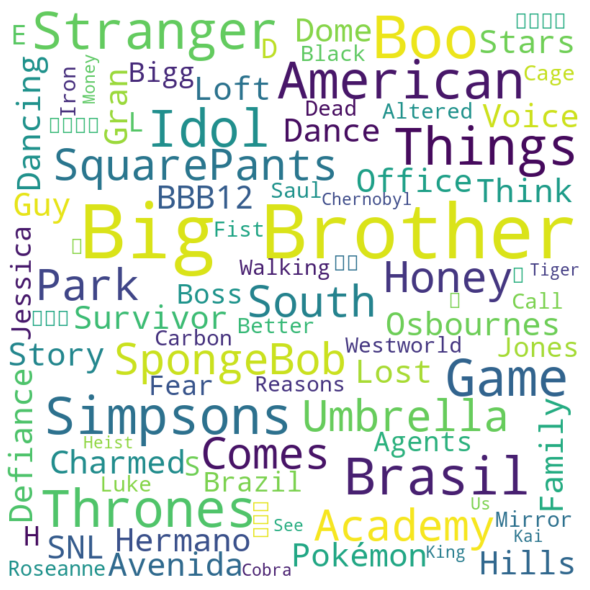

In [31]:
plt.figure(figsize = (8, 10), facecolor = None) 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [39]:
df[(df['location']=='Global')&(df['search_query'].isin(['Big Brother','Big Brother Brazil','Big Brother Brasil',
                                                        'Big Brother 15','BBB12']))]

,location,year,category,rank,search_query
46,Global,2001,TV Shows,2,Big Brother
111,Global,2002,TV Shows,2,Big Brother
701,Global,2008,Reality Shows,2,Big Brother
2985,Global,2012,TV Shows,1,BBB12
5202,Global,2013,TV Shows,3,Big Brother 15
10395,Global,2015,TV Shows,1,Big Brother Brazil
16272,Global,2017,TV Shows,3,Big Brother Brasil
24031,Global,2020,TV Shows,2,Big Brother Brasil


There are 47 unique TV shows in the dataset for the global search results.Big Brother had come up 7 times in top 5 ranks over the years.As the show has different versions (UK,US,Brazil,Australia...) version of the show is not clear except for the Brazilian version as it is mensioned explicitly in the name.First positions were achieved by Brazilian version in 2012 and 2015. The show has been trending from 2001 and never stopped entertaining still.

# PEOPLE

Searches about people have been recorded under different categories like 'People', 'Men', 'Women', 'People:Fastest rising', 'Male celebrity images', 'Female celebrity Images' and 'who is...'. Thus considering all these categories together.

In [72]:
people_df = df[(df['location']=='Global')&(df['category'].isin(['People','Men','Women','Male Celebrity Images',
                                                               'Female Celebrity Images','People: Fastest Rising','Who is...']))]
print('Number of unique entries that came into first 5 place:',len(people_df.search_query.unique()))

people_df[people_df['year']==2020] #Top 5 searched people of 2020

Number of unique entries that came into first 5 place: 90


,location,year,category,rank,search_query
24020,Global,2020,People,1,Joe Biden
24021,Global,2020,People,2,Kim Jong Un
24022,Global,2020,People,3,Boris Johnson
24023,Global,2020,People,4,Kamala Harris
24024,Global,2020,People,5,Tom Hanks


In [73]:
counts=people_df.search_query.value_counts()
counts[counts > 1]

Eminem                6
Britney Spears        4
Pamela Anderson       4
Orlando Bloom         3
Brad Pitt             3
Usher                 2
Johnny Depp           2
Kim Kardashian        2
Carmen Electra        2
Paris Hilton          2
Michael Jackson       2
Christina Aguilera    2
David Beckham         2
Meghan Markle         2
Jennifer Lopez        2
Name: search_query, dtype: int64

Most searched people in 2020 were Joe Biden, Kim Jong Un, Boris Johnson, Kamala Harris and Tom Hanks.From 2010 to 2020 two people managed to get into top positions twice they were Meghan Markle (Second in 2017 and First in 2018) and Kim Kardashian(Fourth in 2010 and second in 2014).

In [74]:
famous_df= df[(df['location']=='Global')&(df['search_query'].isin(['Meghan Markle','Kim Kardashian',
                                                        'Eminem','Pamela Anderson','Britney Spears',
                                                       'Jennifer Lopez','Brad Pitt','Micheal Jackson']))]

count=famous_df.search_query.value_counts()
count[count>2]

Eminem             9
Britney Spears     8
Pamela Anderson    5
Meghan Markle      4
Brad Pitt          4
Name: search_query, dtype: int64

In [75]:
famous_df[(famous_df['location']=='Global')&(~famous_df['category'].isin(['People','Men','Women','Male Celebrity Images',
                                                               'Female Celebrity Images','People: Fastest Rising',
                                                                          'Who is...']))]

,location,year,category,rank,search_query
85,Global,2002,Musicians and Bands,1,Eminem
200,Global,2003,Searches,1,Britney Spears
433,Global,2004,Public Figures,4,Britney Spears
440,Global,2004,Searches,1,Britney Spears
443,Global,2004,Searches,4,Pamela Anderson
479,Global,2005,Most Searched,5,Brad Pitt
557,Global,2007,News Searches,3,Britney Spears
1512,Global,2009,Entertainment,3,Eminem
1962,Global,2010,Entertainment,3,Eminem
16204,Global,2017,Searches,5,Meghan Markle


In [86]:
%matplotlib inline
import matplotlib as plt

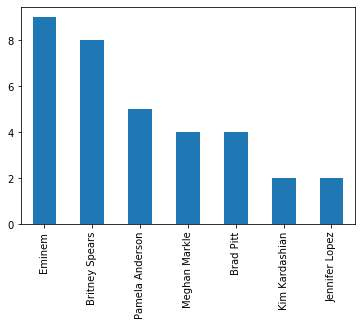

In [90]:
famous_df['search_query'].value_counts().plot(kind='bar')


Eminem is the most searched person in google within various categories as mentioned above followed by Britney Spears.